In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('./input/data/train/train.csv')

In [3]:
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [4]:
df.isnull().sum()

id        0
gender    0
race      0
age       0
path      0
dtype: int64

- 결측치가 없다

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [6]:
df.describe()

,age
count,2700.000000
mean,37.708148
std,16.985904
min,18.000000
25%,20.000000
50%,36.000000
75%,55.000000
max,60.000000


나이에 대해서 특별하게 볼 대상은 없다. 

In [7]:
df['race'].value_counts()

Asian    2700
Name: race, dtype: int64

인종은 하나로 이루어져 있다.

- 클래스 별로 나이 나누어서 비교하기

In [8]:
def get_age(age):
    if age < 30:
        return '0~30'
    elif 30 <= age < 60:
        return '30 ~ 60'
    else:
        return '60~'

In [9]:
df['get_age'] = df['age'].apply(lambda x: get_age(x))

In [10]:
group = df.groupby('gender')['get_age'].value_counts().sort_index()
group

gender  get_age
female  0~30       732
        30 ~ 60    817
        60~        109
male    0~30       549
        30 ~ 60    410
        60~         83
Name: get_age, dtype: int64

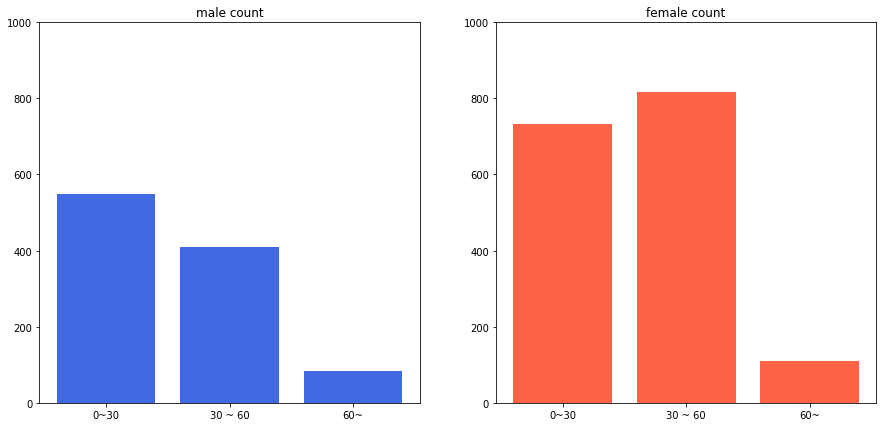

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].bar(group['male'].index, group['male'], color='royalblue')
ax[1].bar(group['female'].index, group['female'], color='tomato')

for a in ax:
    a.set_ylim(0, 1000)
    
ax[0].set_title('male count')
ax[1].set_title('female count')

plt.show()

60살 근처에 빈도가 높은 부분으로 봐서 클래스를 구분하기 힘들수도 있겠다.

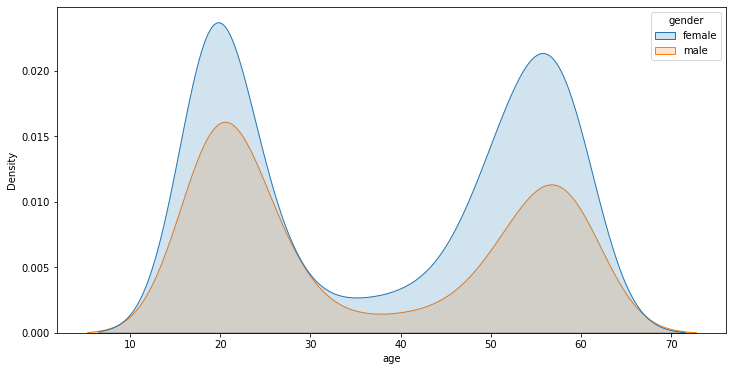

In [12]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
sns.kdeplot(data=df, x='age', hue='gender', fill=True, alpha=0.2, ax=ax)
plt.show()

편차가 심하기 때문에 나이대를 다시 나눠보자

In [13]:
df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

In [14]:
def age_group(age):
    if age < 20:
        return 1
    elif age < 30:
        return 2
    elif age < 40:
        return 3
    elif age < 50:
        return 4
    elif age < 60:
        return 5
    else:
        return 6

In [15]:
df['age_group'] = df['age'].apply(lambda x: age_group(x))

In [16]:
df

,id,gender,race,age,path,get_age,age_group
0,000001,female,Asian,45,000001_female_Asian_45,30 ~ 60,4
1,000002,female,Asian,52,000002_female_Asian_52,30 ~ 60,5
2,000004,male,Asian,54,000004_male_Asian_54,30 ~ 60,5
3,000005,female,Asian,58,000005_female_Asian_58,30 ~ 60,5
4,000006,female,Asian,59,000006_female_Asian_59,30 ~ 60,5
...,...,...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19,0~30,1
2696,006955,male,Asian,19,006955_male_Asian_19,0~30,1
2697,006956,male,Asian,19,006956_male_Asian_19,0~30,1
2698,006957,male,Asian,20,006957_male_Asian_20,0~30,2


<AxesSubplot:xlabel='age_group', ylabel='count'>

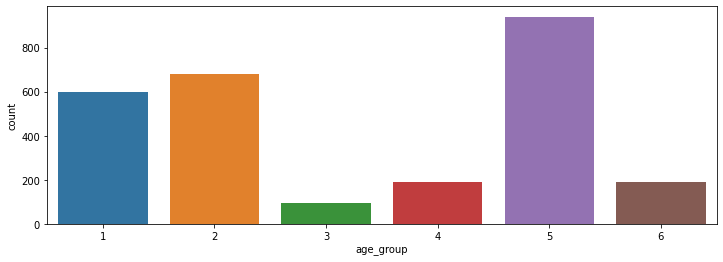

In [17]:
fig = plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='age_group')

30, 40, 60대가 잘 없기 때문에 경계선인 30대와 60대를 구분하기 힘들 것 같다.

In [18]:
group2 = df.groupby('gender')['age_group'].value_counts().sort_index()
group2

gender  age_group
female  1            351
        2            381
        3             60
        4            139
        5            618
        6            109
male    1            248
        2            301
        3             35
        4             53
        5            322
        6             83
Name: age_group, dtype: int64

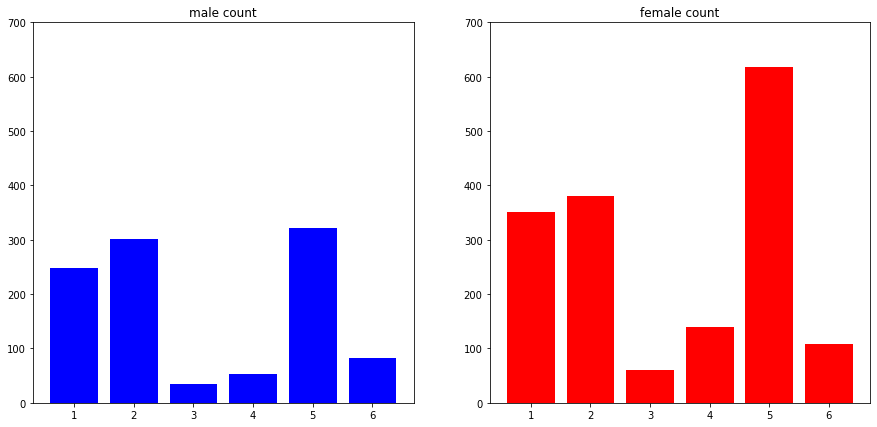

In [402]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].bar(group2['male'].index, group2['male'], color='blue')
ax[1].bar(group2['female'].index, group2['female'], color='red')

for a in ax:
    a.set_ylim(0, 700)
    
ax[0].set_title('male count')
ax[1].set_title('female count')

plt.show()

In [20]:
root = '/opt/ml/input/data/train/images/'

In [21]:
df.head()

,id,gender,race,age,path,get_age,age_group
0,000001,female,Asian,45,000001_female_Asian_45,30 ~ 60,4
1,000002,female,Asian,52,000002_female_Asian_52,30 ~ 60,5
2,000004,male,Asian,54,000004_male_Asian_54,30 ~ 60,5
3,000005,female,Asian,58,000005_female_Asian_58,30 ~ 60,5
4,000006,female,Asian,59,000006_female_Asian_59,30 ~ 60,5


In [22]:
data = pd.DataFrame(columns=['id', 'path', 'label'])

In [23]:
data

,id,path,label


In [24]:
for path in df.path:
    name_id, gender, race, age = path.split('_')
    
    age = int(age)
    if age < 30:
        get_age = 0
    elif age < 60:
        get_age = 1
    else:
        get_age = 2
        
    if gender == 'male':
        gender_point = 0
    else:
        gender_point = 3
        
    for image in list(os.listdir(os.path.join(root, path))):
        # .파일 없애기.. 이거 처음에는 없었던 것 같은데..
        if image[0] == '.':
            continue
        
        # 일반얼굴
        if image.split('.')[0] == 'normal':
            label = 12 + get_age + gender_point
            data = data.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
            
        elif image.split('.')[0] == 'incorrect_mask':
            label = 6 + get_age + gender_point
            data = data.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
        else:
            label = get_age + gender_point
            data = data.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
            
        

In [25]:
mask_dic, gen_dic, age_dic = {}, {}, {}

In [26]:
for i in range(18):
    # mask wear
    if i <= 5:
        mask_dic[i] = 0
    # incorrect
    elif i <= 11:
        mask_dic[i] = 1
    # not wear
    else:
        mask_dic[i] = 2
    
    # 성별
    # 남자
    if i <= 2 or 6 <= i <= 8 or 12 <= i <= 14:
        gen_dic[i] = 0
    else:
        gen_dic[i] = 1
    
    # 나이구분
    if i % 3 == 0:
        age_dic[i] = 0
    elif i % 3 == 1:
        age_dic[i] = 1
    elif i % 3 == 2:
        age_dic[i] = 2
        

data['Mask'] = data['label'].map(mask_dic)
data['Gender'] = data['label'].map(gen_dic)
data['Age'] = data['label'].map(age_dic)

In [28]:
data

,id,path,label,Mask,Gender,Age
0,000001,/opt/ml/input/data/train/images/000001_female_...,4,0,1,1
1,000001,/opt/ml/input/data/train/images/000001_female_...,4,0,1,1
2,000001,/opt/ml/input/data/train/images/000001_female_...,4,0,1,1
3,000001,/opt/ml/input/data/train/images/000001_female_...,16,2,1,1
4,000001,/opt/ml/input/data/train/images/000001_female_...,10,1,1,1
...,...,...,...,...,...,...
18895,006959,/opt/ml/input/data/train/images/006959_male_As...,0,0,0,0
18896,006959,/opt/ml/input/data/train/images/006959_male_As...,12,2,0,0
18897,006959,/opt/ml/input/data/train/images/006959_male_As...,6,1,0,0
18898,006959,/opt/ml/input/data/train/images/006959_male_As...,0,0,0,0


In [85]:
# 파일 저장
data.to_csv('data.csv', index=False)

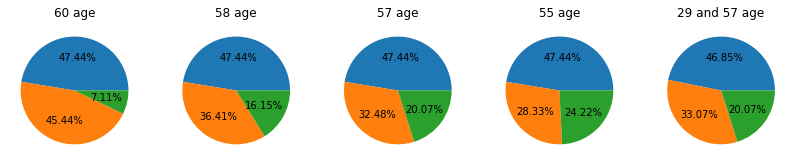

In [138]:
group_age = df.get_age.value_counts()

fig, ax = plt.subplots(1, 5, figsize=(14, 8))

# 원본
ax[0].pie(group_age, autopct=lambda x: '{:.2f}%'.format(x))
ax[0].set_title('60 age')

df.loc[(df.age < 30), 'test_age'] = 0
df.loc[(df.age >= 30), 'test_age'] = 1
df.loc[(df.age >= 58), 'test_age'] = 2

test_age = df.test_age.value_counts()
ax[1].pie(test_age, autopct=lambda x: '{:.2f}%'.format(x))
ax[1].set_title('58 age')

df.loc[(df.age < 30), 'test_age'] = 0
df.loc[(df.age >= 30), 'test_age'] = 1
df.loc[(df.age >= 57), 'test_age'] = 2

test_age = df.test_age.value_counts()
ax[2].pie(test_age, autopct=lambda x: '{:.2f}%'.format(x))
ax[2].set_title('57 age')

df.loc[(df.age < 30), 'test_age'] = 0
df.loc[(df.age >= 30), 'test_age'] = 1
df.loc[(df.age >= 55), 'test_age'] = 2

test_age = df.test_age.value_counts()
ax[3].pie(test_age, autopct=lambda x: '{:.2f}%'.format(x))
ax[3].set_title('55 age')

df.loc[(df.age < 29), 'test_age'] = 0
df.loc[(df.age >= 29), 'test_age'] = 1
df.loc[(df.age >= 57), 'test_age'] = 2

test_age = df.test_age.value_counts()
ax[4].pie(test_age, autopct=lambda x: '{:.2f}%'.format(x))
ax[4].set_title('29 and 57 age')
plt.show()

어느정도 60 경계선의 비율을 조정하면 조금 더 좋은 성능을 낼 수 있을 것 같다

## 각각 비율 알아보기

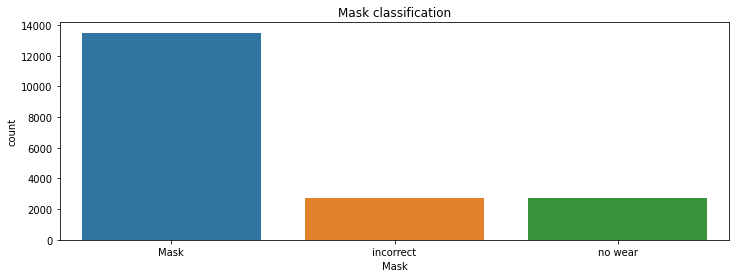

In [29]:
# 마스크
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data, x='Mask', ax=ax)
ax.set_title('Mask classification')
ax.set_xticklabels(['Mask', 'incorrect', 'no wear'])
plt.show()

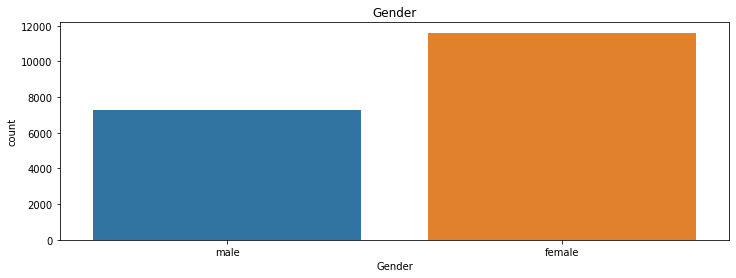

In [30]:
# 성별
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data, x='Gender', ax=ax)
ax.set_title('Gender')
ax.set_xticklabels(['male', 'female'])

plt.show()

나이는 위에서 대략 확인을 하였다

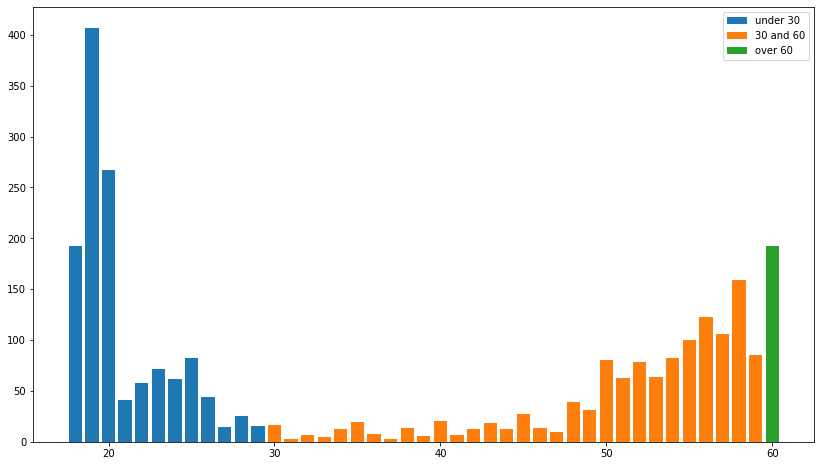

In [400]:
age_lst = df['age'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
plt.bar(age_lst.loc[:30].index, age_lst.loc[:30], label='under 30')
plt.bar(age_lst.loc[30:60].index, age_lst.loc[30:60], label='30 and 60')
plt.bar(age_lst.loc[60:].index, age_lst.loc[60:], label='over 60')
plt.legend()
plt.show()

위에서도 같은 고민을 했지만 50대 중후반이 데이터가 어느정도 있는 반면에 구분이 잘 되지 않는 것 같다.

## 클래스별 확인

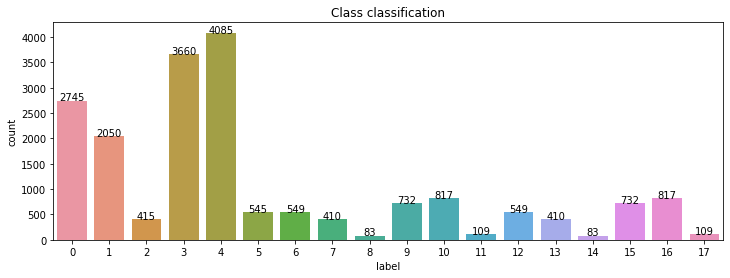

In [31]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data, x='label', ax=ax)
for num in range(18):
    ax.text(x=num, y=len(data[data['label'] == num]), s=len(data[data['label'] == num]), ha='center')

ax.set_title('Class classification')
plt.show()

18개의 클래스로 분류했을때 데이터에 대한 불균형이 심하기 때문에 어떻게 해결해야 할지 모르겠다. 

In [32]:
df.describe(include='all')

,id,gender,race,age,path,get_age,age_group
count,2700,2700,2700,2700.000000,2700,2700,2700.000000
unique,2699,2,1,NaN,2700,3,NaN
top,003397,female,Asian,NaN,005407_female_Asian_26,0~30,NaN
freq,2,1658,2700,NaN,1,1281,NaN
mean,NaN,NaN,NaN,37.708148,NaN,NaN,3.284444
std,NaN,NaN,NaN,16.985904,NaN,NaN,1.778754
min,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,20.000000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,36.000000,NaN,NaN,3.000000
75%,NaN,NaN,NaN,55.000000,NaN,NaN,5.000000


In [33]:
df[df['id'] == '003397']

,id,gender,race,age,path,get_age,age_group
1366,003397,female,Asian,20,003397_female_Asian_20,0~30,2
1367,003397,female,Asian,19,003397_female_Asian_19,0~30,1


마스크와 성별보다는 연령대를 잘 구분할 수 있는 augmentation을 선택해야 할 것 같다. 

In [34]:
import cv2

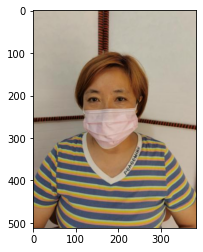

In [212]:
# 이미지 확인
img = data.path[0]
img2 = data.path[1]

image = cv2.imread(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(12, 4))
ax.imshow(image)

In [203]:
import albumentations as A
from albumentations.augmentations import transforms as A_transforms

In [217]:
image2 = cv2.imread(img)
horizon = A_transforms.HorizontalFlip()

In [218]:
image1 = horizon(image=image2)['image']

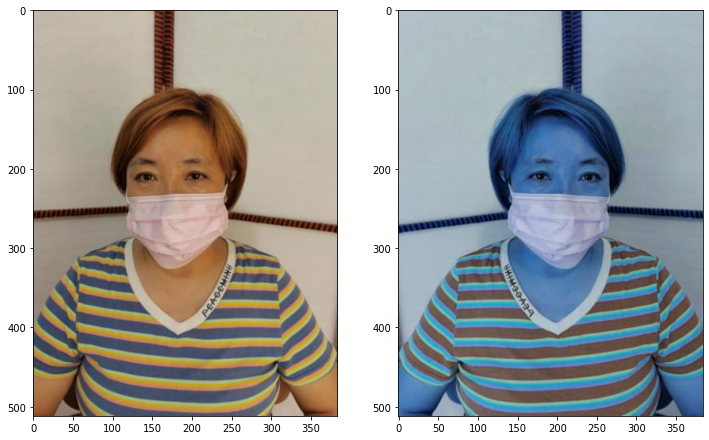

In [219]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(image)
ax[1].imshow(image1)
plt.show()

좌우 반전을 통해 데이터 양을 늘릴 수 있을 것 같다.

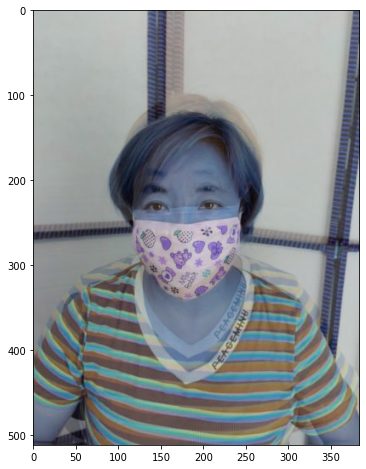

In [76]:
mixup = A_transforms.TemplateTransform(templates=image, img_weight=0.7, template_weight=0.3, p=1)
image3 = mixup(image=image2)['image']
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(image3)
plt.show()

mixup을 통하여 데이터를 늘릴수 있을지 의문이다. 

- 이미지 늘리기

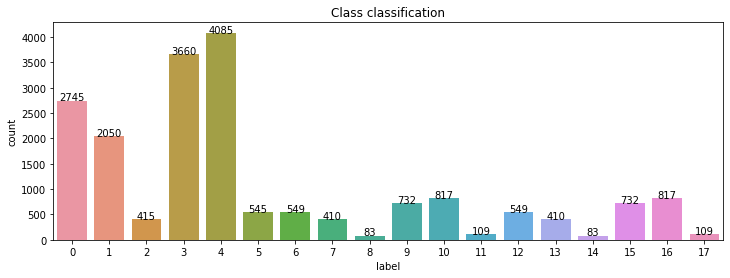

In [140]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data, x='label', ax=ax)
for num in range(18):
    ax.text(x=num, y=len(data[data['label'] == num]), s=len(data[data['label'] == num]), ha='center')

ax.set_title('Class classification')
plt.show()

In [141]:
data

,id,path,label,Mask,Gender,Age
0,000001,/opt/ml/input/data/train/images/000001_female_...,4,0,1,1
1,000001,/opt/ml/input/data/train/images/000001_female_...,4,0,1,1
2,000001,/opt/ml/input/data/train/images/000001_female_...,4,0,1,1
3,000001,/opt/ml/input/data/train/images/000001_female_...,16,2,1,1
4,000001,/opt/ml/input/data/train/images/000001_female_...,10,1,1,1
...,...,...,...,...,...,...
18895,006959,/opt/ml/input/data/train/images/006959_male_As...,0,0,0,0
18896,006959,/opt/ml/input/data/train/images/006959_male_As...,12,2,0,0
18897,006959,/opt/ml/input/data/train/images/006959_male_As...,6,1,0,0
18898,006959,/opt/ml/input/data/train/images/006959_male_As...,0,0,0,0


In [260]:
horizon = A_transforms.HorizontalFlip(0.5)
for i in range(len(data)):
    transform = A.Compose([
        A.HorizontalFlip(p=1),
    ])
    if data.iloc[i].label in [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]:
        try:
            if 'incorrect' in data.iloc[i].path:
                img = cv2.imread(data.iloc[i].path)
                transformed = transform(image=img)['image']
                cv2.imwrite(f'{data.iloc[i].path[:69]}_2.jpg', transformed)
            elif 'normal' in data.iloc[i].path:
                img = cv2.imread(data.iloc[i].path)
                transformed = transform(image=img)['image']
                cv2.imwrite(f'{data.iloc[i].path[:61]}_2.jpg', transformed)
        except:
            continue

In [262]:
data2 = pd.DataFrame(columns=['id', 'path', 'label'])

In [263]:
for path in df.path:
    name_id, gender, race, age = path.split('_')
    
    age = int(age)
    if age < 30:
        get_age = 0
    elif age < 60:
        get_age = 1
    else:
        get_age = 2
        
    if gender == 'male':
        gender_point = 0
    else:
        gender_point = 3
        
    for image in list(os.listdir(os.path.join(root, path))):
        # .파일 없애기.. 이거 처음에는 없었던 것 같은데..
        if image[0] == '.':
            continue
        
        # 일반얼굴
        if image.split('.')[0] == 'normal' or image.split('.')[0] == 'normal_2':
            label = 12 + get_age + gender_point
            data2 = data2.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
            
        elif image.split('.')[0] == 'incorrect_mask' or image.split('.')[0] == 'incorrect_mask_2':
            label = 6 + get_age + gender_point
            data2 = data2.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
        else:
            label = get_age + gender_point
            data2 = data2.append({'id': name_id, 'path': os.path.join(root, path, image), 'label': label}, ignore_index=True)
            
        

In [264]:
mask_dic, gen_dic, age_dic = {}, {}, {}

for i in range(18):
    # mask wear
    if i <= 5:
        mask_dic[i] = 0
    # incorrect
    elif i <= 11:
        mask_dic[i] = 1
    # not wear
    else:
        mask_dic[i] = 2
    
    # 성별
    # 남자
    if i <= 2 or 6 <= i <= 8 or 12 <= i <= 14:
        gen_dic[i] = 0
    else:
        gen_dic[i] = 1
    
    # 나이구분
    if i % 3 == 0:
        age_dic[i] = 0
    elif i % 3 == 1:
        age_dic[i] = 1
    elif i % 3 == 2:
        age_dic[i] = 2
        

data2['Mask'] = data2['label'].map(mask_dic)
data2['Gender'] = data2['label'].map(gen_dic)
data2['Age'] = data2['label'].map(age_dic) 

In [265]:
data2.to_csv('data2.csv', index=False)

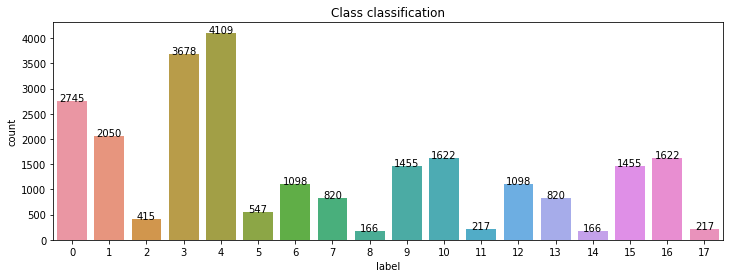

In [266]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(data2, x='label', ax=ax)
for num in range(18):
    ax.text(x=num, y=len(data2[data2['label'] == num]), s=len(data2[data2['label'] == num]), ha='center')

ax.set_title('Class classification')
plt.show()